<font color='blue'> **10c__________________________________ PyGSLIB_to_Zahasky_08d** </font> `____________` <font color='red'> **myenv**

In [52]:
import numpy as np ; import pandas as pd ; print("Pandas version:", pd.__version__, "     NumPy version:", np.__version__)

Pandas version: 2.3.1      NumPy version: 1.23.5


In [53]:
import os; import sys ; from pathlib import Path  ;_R=Path("_R")  ;_R.mkdir(exist_ok=True); TA=Path("_R/b09c")  ;TA.mkdir(exist_ok=True) ; import matplotlib.pyplot as plt ;
import pygslib as gslib ; from scipy import stats;import math ; sys.path.append('E:/15_REPOS/02_Beta-Me/data/Krig/BibliOS') ; from Beta_lib import GSLIB_sgsim_2d_uncond, affine

In [54]:
#ny = 10; nx = 10; cell_size =  10                         ; xmin=0.0;ymin=0.0;xmax=xmin+nx*cell_size;ymax=ymin+ny*cell_size        #;print('xmax,ymax:',xmax,ymax)
#seed = 3                                                  ; range_max = 400 ; range_min = 10   ; azimuth = 90

ny = 30; nx = 100; cell_size =  10                         ; xmin=0.0;ymin=0.0;xmax=xmin+nx*cell_size;ymax=ymin+ny*cell_size       # ;print('xmax,ymax:',xmax,ymax)
seed = 10                                                  ; range_max = 200 ; range_min = 50   ; azimuth = 90
sim1,value =(GSLIB_sgsim_2d_uncond(1,nx,ny,cell_size,seed  , range_max       , range_min         , azimuth  ,"simulation"))                   ; sim1 = (sim1 +-sim1.min()) 
xx, yy = np.meshgrid(np.arange(xmin, xmax, cell_size),np.arange(ymax, ymin, -1*cell_size))         ; F1 =  pd.DataFrame((sim1.reshape(-1)))     ; F1.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
0,3000.0,3.423754,0.951367,0.0,2.799469,3.473271,4.100775,6.283673


In [55]:
MEAN=sim1.reshape(-1).mean() ;STDEV=2 ; BB= 20
sim2=affine(sim1,MEAN,STDEV)     ;sim3=(sim2-sim2.min())/BB  ; sim4=sim3+np.quantile(sim3, .01); F2 = pd.DataFrame((((sim3.reshape(-1)))))  ; F2.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
0,3000.0,0.359937,0.100017,0.0,0.294307,0.365143,0.431112,0.660599


____________

In [56]:
F2.columns=['SEL']                                         ; PD = F2; F2['NN'] = F2.index + 1 
n='n'                              ; MD=0 ; ST=1           ; PD['Z']=((PD['SEL'] -PD['SEL'].mean()) /np.std(PD['SEL']*ST,ddof=0))+MD
PD['PDF'] = stats.norm.pdf(PD['Z'],loc=0,scale=1)          ; PD['CDF'] = stats.norm.cdf(PD['Z'],loc=0,scale=1)
MD=0     ;  ST=.05       ;PD['Z2']=((PD['SEL']-PD['SEL'].mean())/np.std(PD['SEL']*ST,ddof=0))+MD  ;PD['pdf2']=stats.norm.pdf(PD['Z2'],loc=0,scale=1) ;PD['cdf2']=stats.norm.cdf(PD['Z2'],loc=0,scale=1)
n='n'                                                      ; PD['RES__'] = ((PD['Z2'] * np.std(PD['SEL']+MD,ddof=0)))+PD['SEL'].mean() 
n='n'                                                      ; PDS = PD.sort_values(by=['SEL','RES__'], ascending=[True, True])

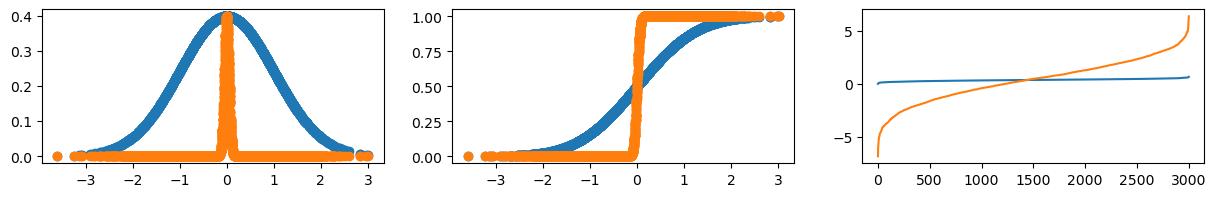

In [57]:
fig = plt.figure(figsize=(15,2))  
plt.subplot(131) ; plt.scatter(PD['Z'], PD['PDF'])             ; plt.subplot(132)   ; plt.scatter(PD['Z'], PD['CDF'])
plt.subplot(131) ; plt.scatter(PD['Z'], PD['pdf2'])            ; plt.subplot(132)   ; plt.scatter(PD['Z'], PD['cdf2']) 
plt.subplot(133) ; plt.plot(PD[['NN']], PDS[['SEL','RES__']])  ; plt.show()         #; PD.head(2)

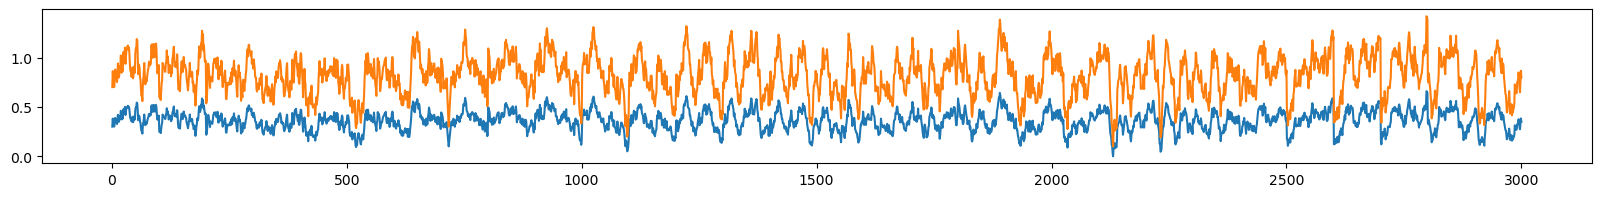

,count,mean,std,min,25%,50%,75%,max
RES__,3000.0,0.819933,0.200033,0.100058,0.688671,0.830344,0.962282,1.421256


In [58]:
PD = pd.concat([F2['SEL'], PD['RES__']], axis=1)                ; RES2 = PD['RES__'].to_numpy()                              ; RES3 = PD['RES__'].to_frame() #;RES3.describe().transpose()   
BB = 10            ; SIM1=(RES3-RES3.min())/BB  ; SIM2 = SIM1+SIM1.quantile(q=0.001, axis=0 ,interpolation='linear')     
PLOT=SIM2 ; PLOT['NN'] = PLOT.index + 1        ; PLOT2 = pd.concat([PLOT, PDS['SEL'], PDS['RES__']], axis=1)                 ; PLOT2.columns = ['New','NN','SEL','RES__']
fig = plt.figure(figsize=(20,2))               ; plt.subplot(111) ; plt.plot(PLOT2[['NN']], PLOT2[['SEL', 'New']])   ; plt.show()  ; pd.DataFrame(SIM2.iloc[:,0]).describe().transpose()

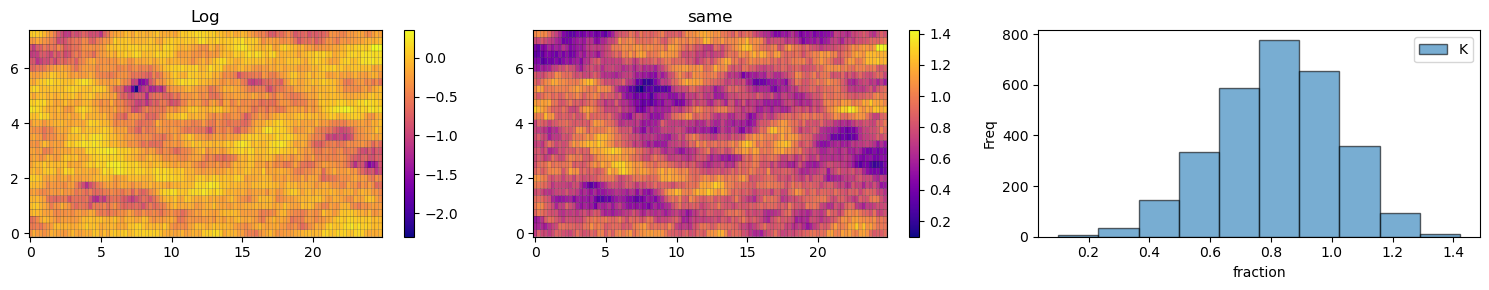

In [59]:
SIM3 = SIM2.iloc[:,0].to_numpy().reshape(ny, nx)
LGRID=[0.25,0.25] ; Lx=(nx-1)*LGRID[1] ;Ly=(ny-1)*LGRID[0]       ; y,x = np.mgrid[slice(0,Ly+LGRID[0],LGRID[0])    ,slice(0,Lx+LGRID[1],LGRID[1])]
fig=plt.figure(figsize=(15,3))                                                                       
ax=fig.add_subplot(131) ;plt.pcolor     ( x ,y,np.log(SIM3) ,cmap='plasma',shading='auto',edgecolor='k',linewidth=0.1)     ;plt.colorbar()                    ; plt.title('Log') 
ax=fig.add_subplot(132) ;plt.pcolor     ( x ,y,SIM3         ,cmap='plasma',shading='auto',edgecolor='k',linewidth=0.1)     ;plt.colorbar()                    ; plt.title('same') 
ax=fig.add_subplot(133) ;plt.hist       (SIM3.flatten()  ,alpha=0.6,edgecolor='black',label='K')   ;plt.xlabel('fraction'); plt.ylabel('Freq') ;plt.legend()  ; plt.tight_layout() ;plt.show()

In [60]:
TB= Path('E:/15_REPOS/02_Beta-Me/data/Madison') ; DD=pd.DataFrame(SIM3.reshape(-1)).to_numpy()  ; np.savetxt(TB/'output.csv', DD, delimiter=',', fmt='%s')  # ; print(DD.shape ) ; print(SIM3[0].shape)
TC=Path("E:/15_REPOS/02_Beta-Me/data/Krig/Beta03")
np.savetxt(TC/'hk1.csv',  SIM3[0], delimiter=',',fmt='%s');np.savetxt(TC/'hk2.csv',  SIM3[1], delimiter=',',fmt='%s');np.savetxt(TC/'hk3.csv',  SIM3[2], delimiter=',',fmt='%s');
np.savetxt(TC/'hk4.csv',  SIM3[3], delimiter=',',fmt='%s');np.savetxt(TC/'hk5.csv',  SIM3[4], delimiter=',',fmt='%s');np.savetxt(TC/'hk6.csv',  SIM3[5], delimiter=',',fmt='%s');
np.savetxt(TC/'hk7.csv',  SIM3[6], delimiter=',',fmt='%s');np.savetxt(TC/'hk8.csv',  SIM3[7], delimiter=',',fmt='%s');np.savetxt(TC/'hk9.csv',  SIM3[8], delimiter=',',fmt='%s');
np.savetxt(TC/'hk10.csv', SIM3[9], delimiter=',',fmt='%s');np.savetxt(TC/'hk11.csv',SIM3[10], delimiter=',',fmt='%s');np.savetxt(TC/'hk12.csv',SIM3[11], delimiter=',',fmt='%s');
np.savetxt(TC/'hk13.csv',SIM3[12], delimiter=',',fmt='%s');np.savetxt(TC/'hk14.csv',SIM3[13], delimiter=',',fmt='%s');np.savetxt(TC/'hk15.csv',SIM3[14], delimiter=',',fmt='%s');
np.savetxt(TC/'hk16.csv',SIM3[15], delimiter=',',fmt='%s');np.savetxt(TC/'hk17.csv',SIM3[16], delimiter=',',fmt='%s');np.savetxt(TC/'hk18.csv',SIM3[17], delimiter=',',fmt='%s');
np.savetxt(TC/'hk19.csv',SIM3[18], delimiter=',',fmt='%s');np.savetxt(TC/'hk20.csv',SIM3[19], delimiter=',',fmt='%s');np.savetxt(TC/'hk21.csv',SIM3[20], delimiter=',',fmt='%s');
np.savetxt(TC/'hk22.csv',SIM3[21], delimiter=',',fmt='%s');np.savetxt(TC/'hk23.csv',SIM3[22], delimiter=',',fmt='%s');np.savetxt(TC/'hk24.csv',SIM3[23], delimiter=',',fmt='%s');
np.savetxt(TC/'hk25.csv',SIM3[24], delimiter=',',fmt='%s');np.savetxt(TC/'hk26.csv',SIM3[25], delimiter=',',fmt='%s');np.savetxt(TC/'hk27.csv',SIM3[26], delimiter=',',fmt='%s');
np.savetxt(TC/'hk28.csv',SIM3[27], delimiter=',',fmt='%s');np.savetxt(TC/'hk29.csv',SIM3[28], delimiter=',',fmt='%s');np.savetxt(TC/'hk30.csv',SIM3[29], delimiter=',',fmt='%s');

In [61]:
#import gstools as gs
#XX = range(9);ZZ=range(25)        ; M = gs.Exponential(dim=2, var=4, len_scale=[10,0.5], nugget=0, angles=np.pi / 2)    ; S3 = gs.SRF(M)        ; nonebut  =S3.structured([XX, ZZ])  
#VA3 = [1e-7, 1e-2, 1e-0, 2, 10]   ; T2B=S3.transform("discrete", store="f3", values=VA3, thresholds='equal')            #  ;  thresholds = [-1, 1,2,3]  
#fig = plt.figure(figsize=(14,6), dpi=120)                  
#ax=fig.add_subplot(132); im=plt.imshow(T2B,cmap='PuOr') ;cb=plt.colorbar(im, shrink=.25)   ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks() ; plt.tight_layout();plt.show()   #;plt.axis('off')
#pd.DataFrame(T2B.reshape(-1)).describe().transpose()                        